In [1]:
from tifffile import imread
import os
from os.path import exists
import cv2
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import numpy as np
import pandas as pd

pd.options.mode.chained_assignment = None  # default='warn'

## Parameters and path

In [23]:
um_per_pixel = 0.117
folder_save = "/Volumes/AnalysisGG/FUS_SPT_bandpass/spots_reformatted"
os.chdir(folder_save)

# fname1 = "20230822_FUS_SPT_in_condensate_11ms_FOV-good-part1-spots_r5q5_reformatted.csv"
# fname2 = "20230822_FUS_SPT_in_condensate_11ms_FOV-good-part2-spots_r5q5_reformatted.csv"
# df1 = pd.read_csv(fname1)
# df2 = pd.read_csv(fname2)

fname = "20230824_FUS_SPT_11ms_FOV-1-spots_reformatted.csv"
df = pd.read_csv(fname)

line_color = "white"  # #00274C
scalebar_color = "white"

# color
color_condensate_edge = "#a7cced"
cmap_color_start = "black"
cmap_color_end = "#B9DBF4"
cmap_name = "dark2cyan"
cmap = clr.LinearSegmentedColormap.from_list(
    cmap_name,
    [cmap_color_start, cmap_color_end],
    N=100,
)

## Construct PAINT image

In [24]:
scaling_factor = 1
um_per_pixel_PAINT = um_per_pixel / scaling_factor
xedges = np.arange((418 + 1) * scaling_factor)
yedges = np.arange((674 + 1) * scaling_factor)

# To concat two videos
# img_PAINT_1, _, _ = np.histogram2d(
#     x=df1["x"] * scaling_factor,
#     y=df1["y"] * scaling_factor,
#     bins=(xedges, yedges),
# )
# img_PAINT_2, _, _ = np.histogram2d(
#     x=df2["x"] * scaling_factor,
#     y=df2["y"] * scaling_factor,
#     bins=(xedges, yedges),
# )

# img_PAINT = img_PAINT_1 + img_PAINT_2

img_PAINT, _, _ = np.histogram2d(
    x=df["x"] * scaling_factor,
    y=df["y"] * scaling_factor,
    bins=(xedges, yedges),
)
scalebar_length_um = 5
scalebar_length_pxl = scalebar_length_um * scaling_factor / um_per_pixel

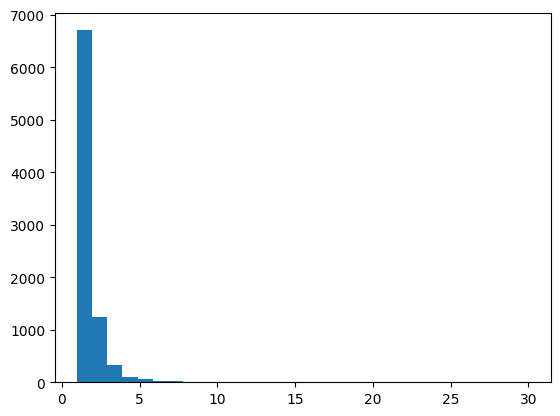

In [25]:
# Plot distribution as reference

plt.hist(img_PAINT.reshape(-1), bins=30, range=(1, 30))
plt.show()

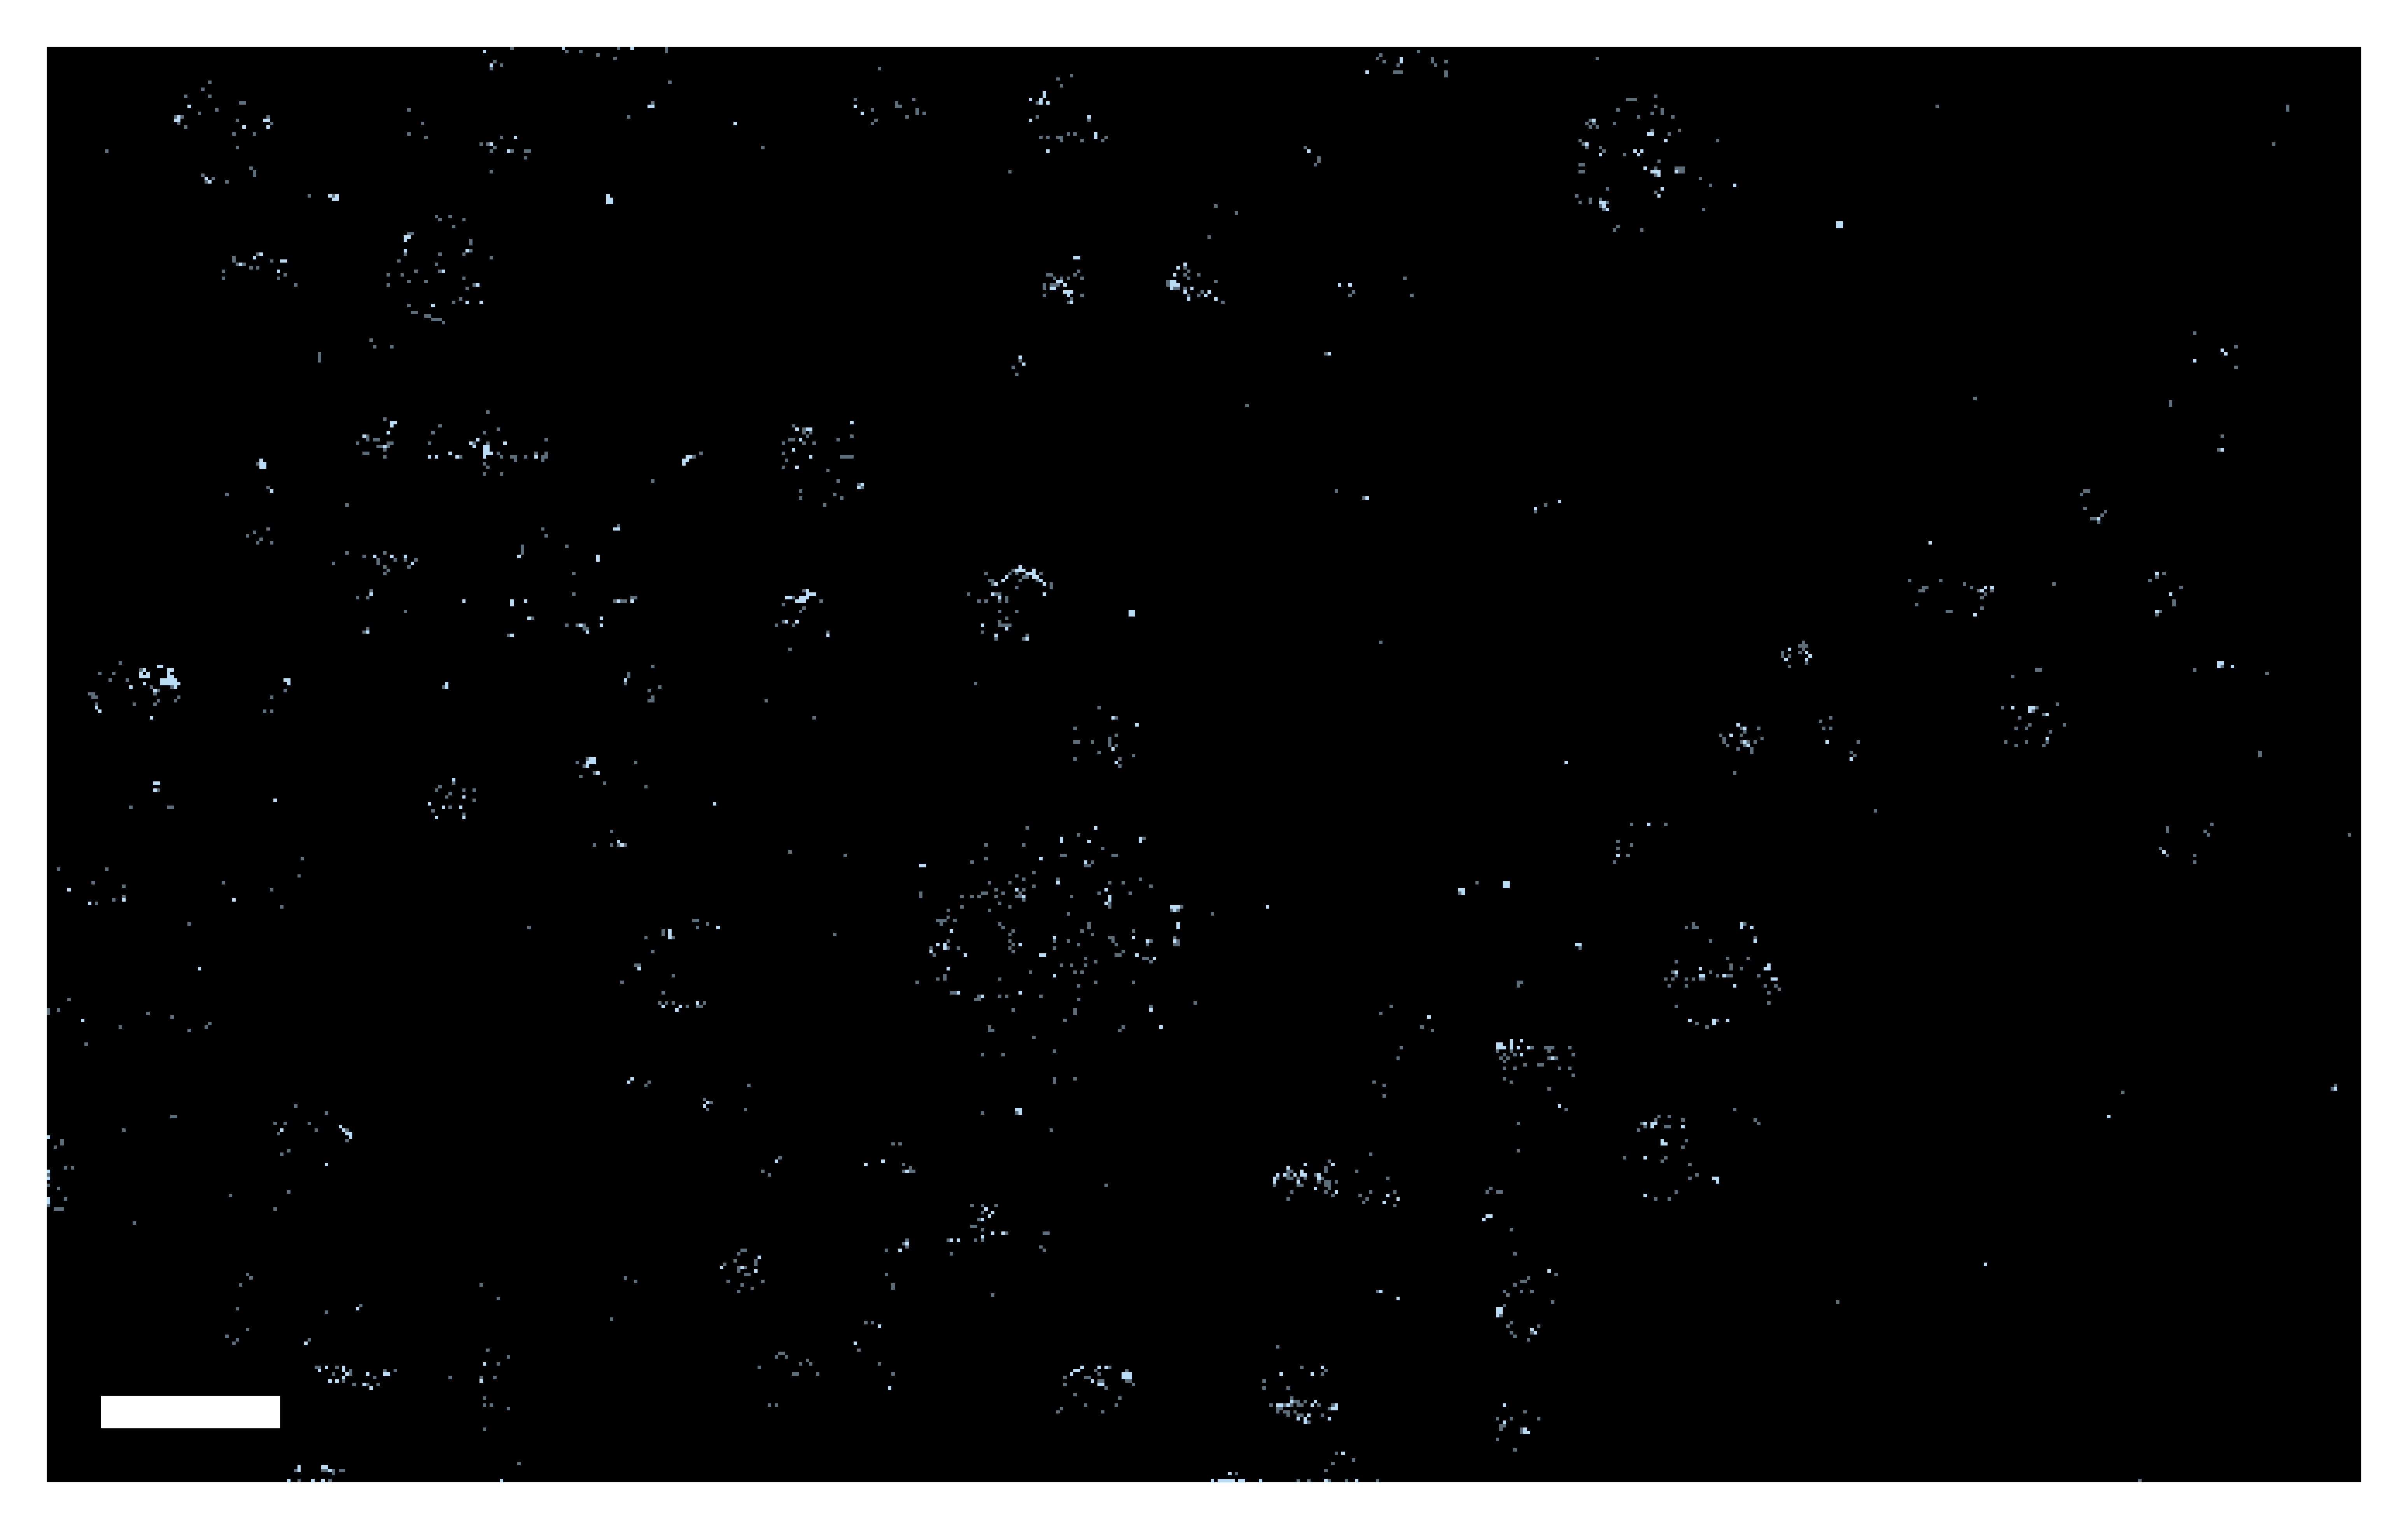

In [27]:
scale_bar_offset = 20

plt.figure(dpi=1200)
# PAINT
plt.imshow(
    img_PAINT,
    cmap=cmap,
    vmin=1,
    vmax=3,
    resample=False,
)
# scale bar
plt.plot(
    [scale_bar_offset, scale_bar_offset + scalebar_length_pxl],
    [scale_bar_offset, scale_bar_offset],
    "-",
    color=scalebar_color,
    lw=5,
)
plt.gca().invert_yaxis()
plt.axis("scaled")
plt.axis("off")
# fname_save = fname1.split("part")[0] + "PAINT_overview.png"
fname_save = fname.split("spots")[0] + "PAINT_overview.png"
plt.savefig(fname_save, bbox_inches="tight", format="png", dpi=1200)
plt.show()

## Zoom in

#### Refernce plot

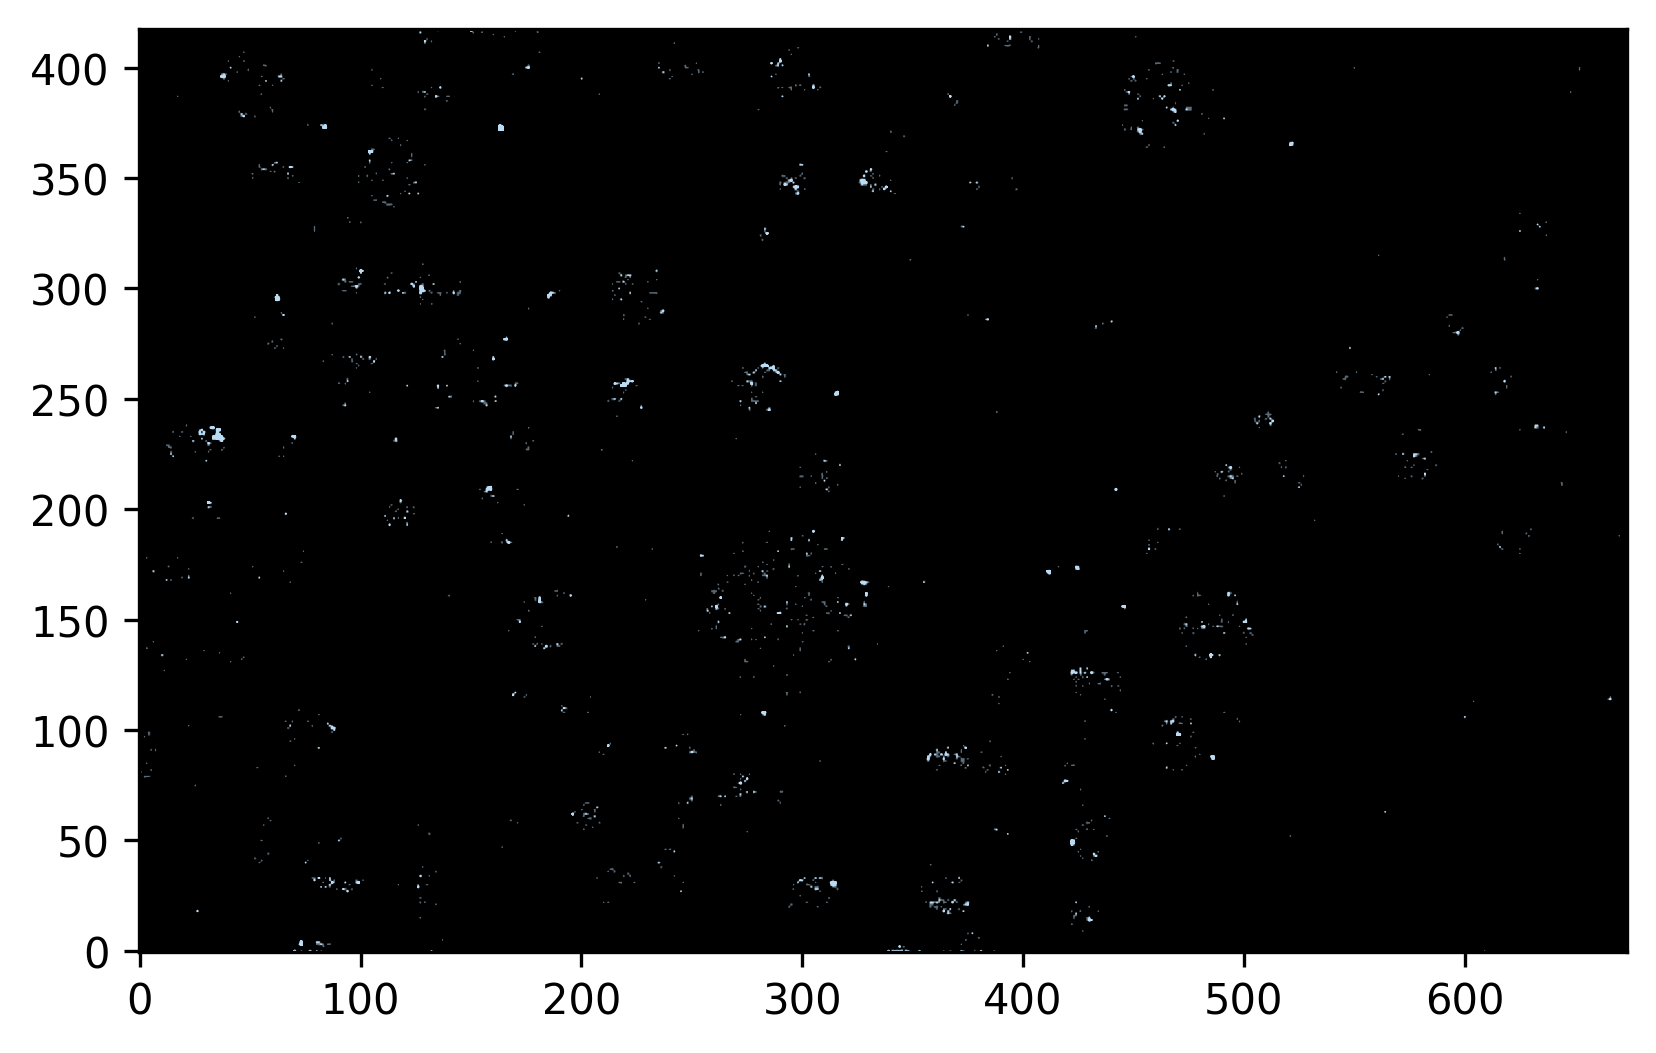

In [26]:
plt.figure(dpi=300)
# PAINT
plt.imshow(
    img_PAINT,
    cmap=cmap,
    vmin=1,
    vmax=3,
    resample=False,
)
plt.gca().invert_yaxis()
plt.axis("scaled")
plt.show()

#### test zoom in

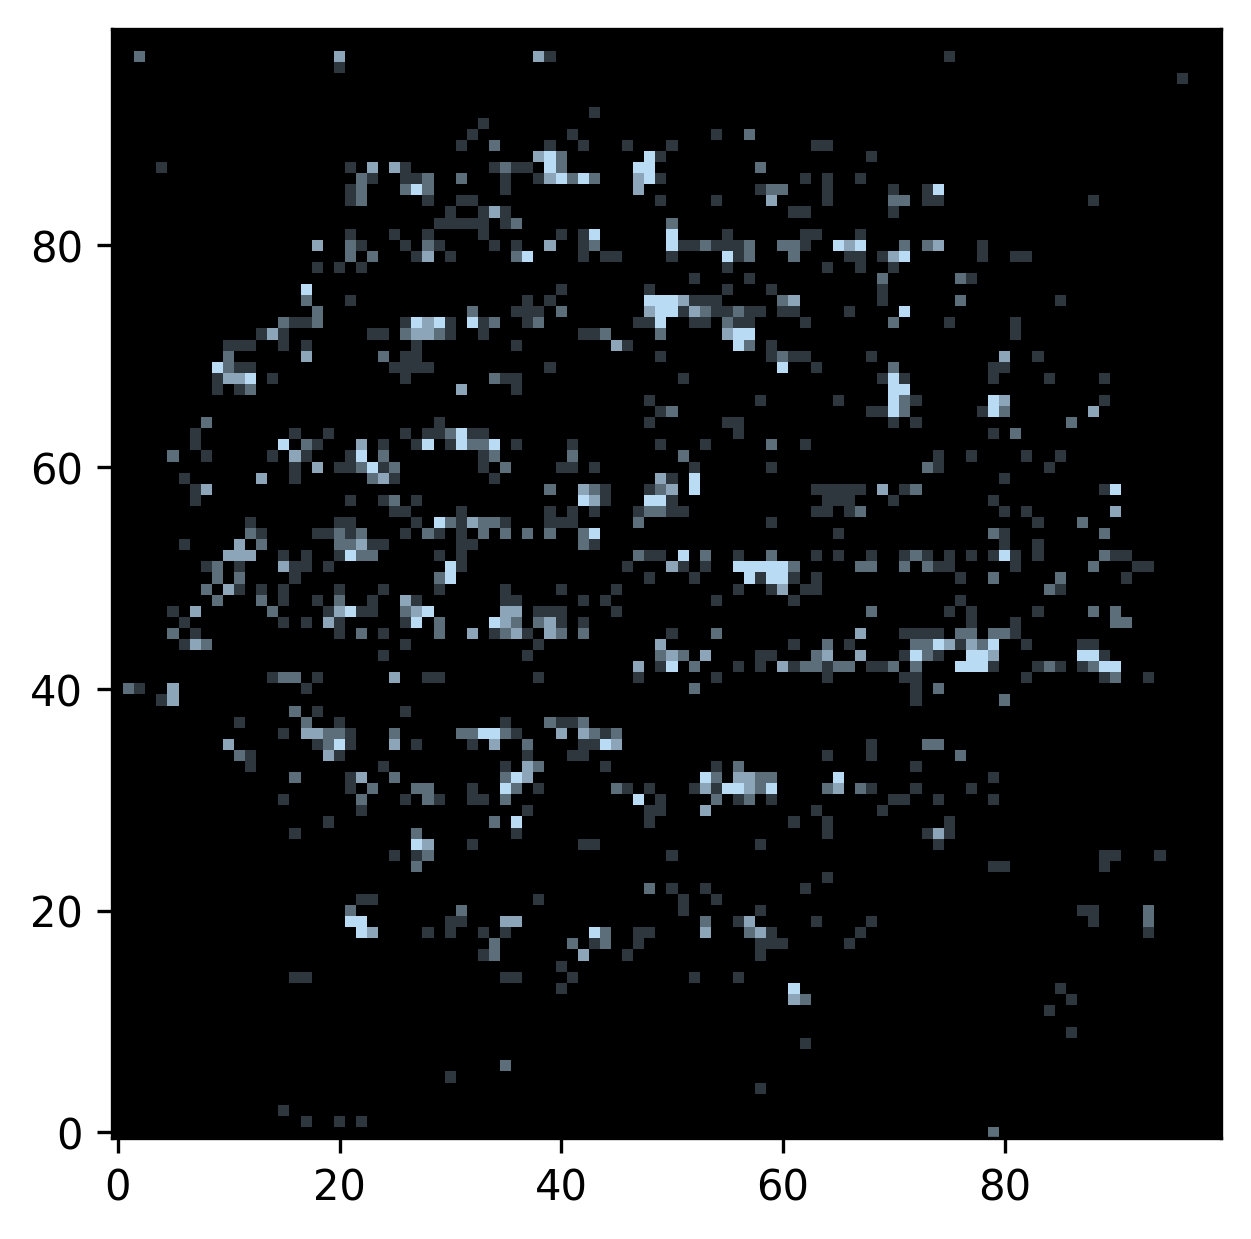

In [16]:
plt.figure(dpi=300)
# PAINT
plt.imshow(
    img_PAINT[140:240, 250:350],
    cmap=cmap,
    vmin=1,
    vmax=5,
    resample=False,
)
plt.gca().invert_yaxis()
plt.axis("scaled")
plt.show()

#### real plot

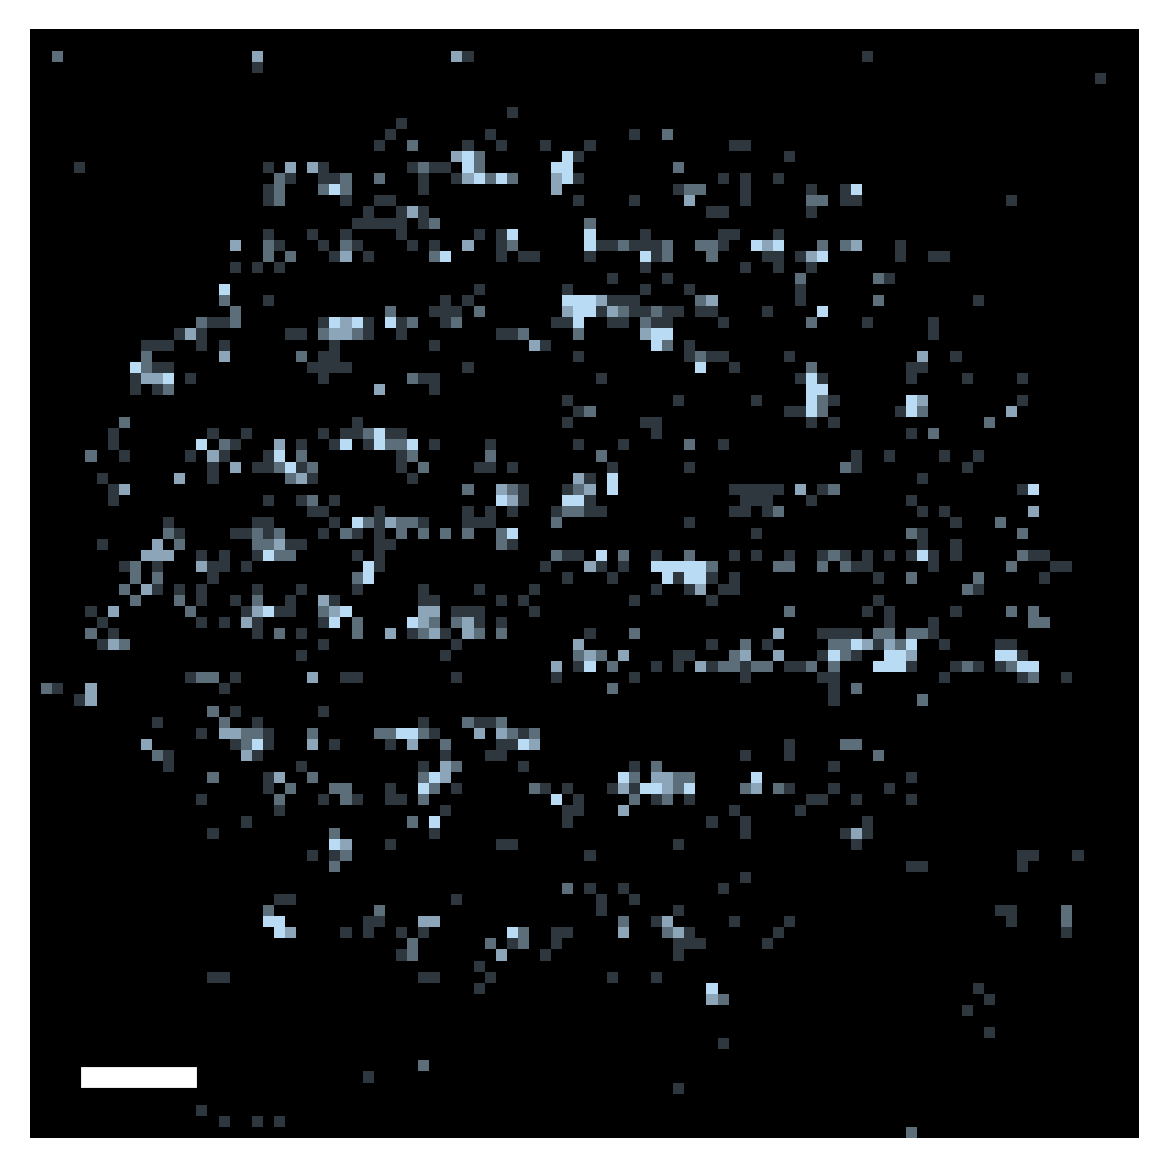

In [17]:
plt.figure(dpi=300)
# PAINT
plt.imshow(
    img_PAINT[140:240, 250:350],
    cmap=cmap,
    vmin=1,
    vmax=5,
    resample=False,
)
# scale bar
scale_bar_offset = 5
scalebar_length_um = 1
scalebar_length_pxl = scalebar_length_um * scaling_factor / um_per_pixel
plt.plot(
    [scale_bar_offset, scale_bar_offset + scalebar_length_pxl],
    [scale_bar_offset, scale_bar_offset],
    "-",
    color=scalebar_color,
    lw=5,
)
plt.gca().invert_yaxis()
plt.axis("scaled")
plt.axis("off")
fname_save = fname.split("spots")[0] + "PAINT_overview_zoomed_in.png"
plt.savefig(fname_save, bbox_inches="tight", format="png", dpi=1200)
plt.show()